In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0)

In [2]:
from pymsastro.spectrum.synthetic.analyze import *
from pymsastro.spectrum.synthetic import SynSpectrum
import numpy as np

In [3]:
# Signal
signal = np.ones(1000) * 50
# Spectrum
spec = SynSpectrum(signal)
# Make an analysation class for no weighting
analyze = AddSynSpectrumAnalyseNone()
# Analyze the spectrum added to itself
analyze.analyze(spec, spec)
# Print the result
print(analyze.result)

{'rmse_noise': [7.1356849706247543], 'der_snr': [7.1832871973543728], 'der_signal': [50.0], 'der_noise': [6.9606015499999998], 'rmse_snr': [7.0070357934568852]}


In [4]:
# Do the same analyzation with the same spectrum again
analyze.analyze(spec, spec)
# Print the result
print(analyze.result)
# Same result as before but added to the results lists.

{'rmse_noise': [7.1356849706247543, 7.1356849706247543], 'der_snr': [7.1832871973543728, 7.1832871973543728], 'der_signal': [50.0, 50.0], 'der_noise': [6.9606015499999998, 6.9606015499999998], 'rmse_snr': [7.0070357934568852, 7.0070357934568852]}


In [5]:
# Doing it 10 times more
for i in range(10):
    analyze.analyze(spec, spec)
print(analyze.result)
# It's getting bigger.

{'rmse_noise': [7.1356849706247543, 7.1356849706247543, 7.1356849706247543, 7.1356849706247543, 7.1356849706247543, 7.1356849706247543, 7.1356849706247543, 7.1356849706247543, 7.1356849706247543, 7.1356849706247543, 7.1356849706247543, 7.1356849706247543], 'der_snr': [7.1832871973543728, 7.1832871973543728, 7.1832871973543728, 7.1832871973543728, 7.1832871973543728, 7.1832871973543728, 7.1832871973543728, 7.1832871973543728, 7.1832871973543728, 7.1832871973543728, 7.1832871973543728, 7.1832871973543728], 'der_signal': [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], 'der_noise': [6.9606015499999998, 6.9606015499999998, 6.9606015499999998, 6.9606015499999998, 6.9606015499999998, 6.9606015499999998, 6.9606015499999998, 6.9606015499999998, 6.9606015499999998, 6.9606015499999998, 6.9606015499999998, 6.9606015499999998], 'rmse_snr': [7.0070357934568852, 7.0070357934568852, 7.0070357934568852, 7.0070357934568852, 7.0070357934568852, 7.0070357934568852, 7.007035793456

In [7]:
# Now make a factory
signal1 = np.ones(10000) * 10
signal2 = np.ones(10000) * 20
factory = AnalyseFactory(signal1, signal2)
factory.run_analysation(1, 1, 5, 5)
print(factory.result)

{'None           ': {'rmse_noise': [4.4389305841869833], 'der_snr': [3.3684935087812824], 'der_signal': [15.052024512995061], 'der_noise': [4.4684736585527425], 'rmse_snr': [3.3791922886641266]}, 'Spec1          ': {'rmse_noise': [5.8396592975854746], 'der_snr': [1.7148569941962684], 'der_signal': [10.037619218607865], 'der_noise': [5.8533272760230188], 'rmse_snr': [1.7124286692777955]}, 'Ideal - Optimal': {'rmse_noise': [4.6747811796049756], 'der_snr': [3.4746024744754829], 'der_signal': [16.140391360718606], 'der_noise': [4.645248335395582], 'rmse_snr': [3.4412212900836785]}, 'DER   - 1/N^2  ': {'rmse_noise': [4.3959633007156018], 'der_snr': [3.269110549192646], 'der_signal': [14.401336682239242], 'der_noise': [4.4052767459319657], 'rmse_snr': [3.2745775909605901]}, 'Ideal - 1/N^2  ': {'rmse_noise': [4.3956717299958372], 'der_snr': [3.2697997962710583], 'der_signal': [14.384011967216477], 'der_noise': [4.399049747210908], 'rmse_snr': [3.2702624042431876]}, 'Ideal - SNR^2  ': {'rmse_n

In [8]:
# But a factory is getting really good if there the spectrums should change a bit.

# Suppose signal 1 should be in the range of 10-30 with 100 steps:
factor1 = np.linspace(5, 45, 100)
signal1 = np.ones(10000)
#factor2 = np.linspace(5, 50, 100)
signal2 = np.ones(10000)

factory = AnalyseFactory(signal1, signal2)
factory.run_analysation(factor1, 25, 5, 5)

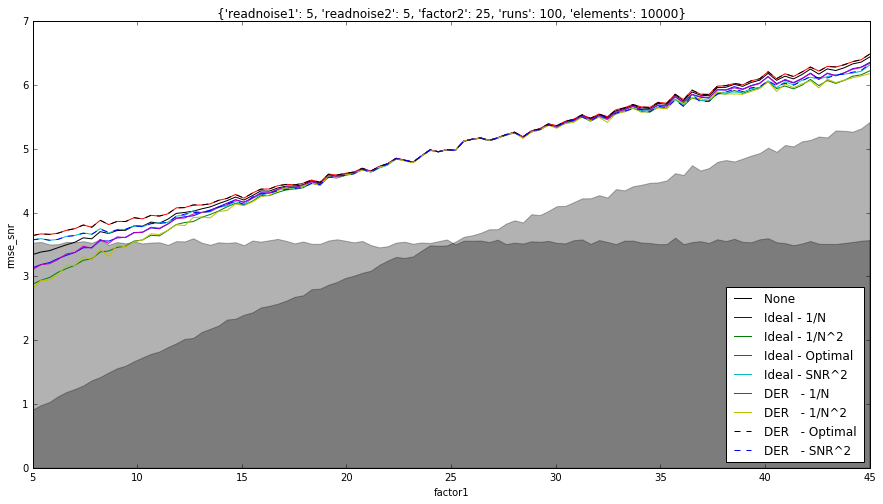

In [9]:
factory.plot('rmse_snr', include_ideal=True, include_der=True)

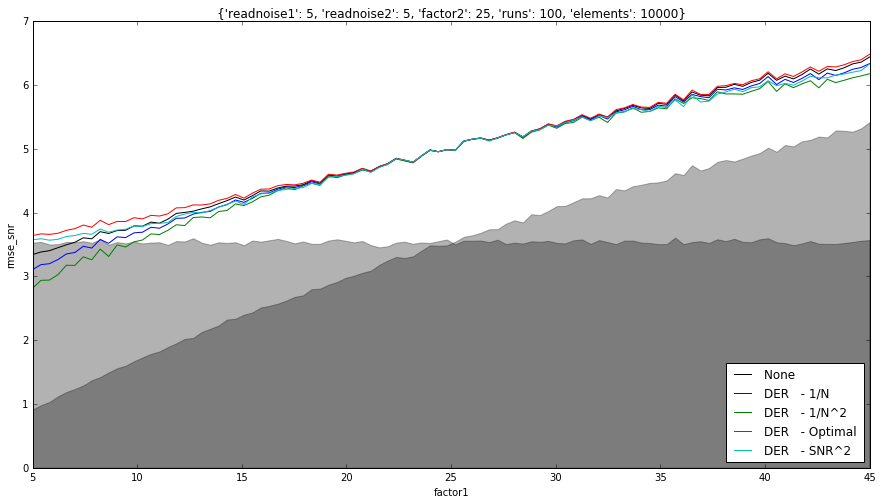

In [10]:
factory.plot('rmse_snr', include_ideal=False, include_der=True)

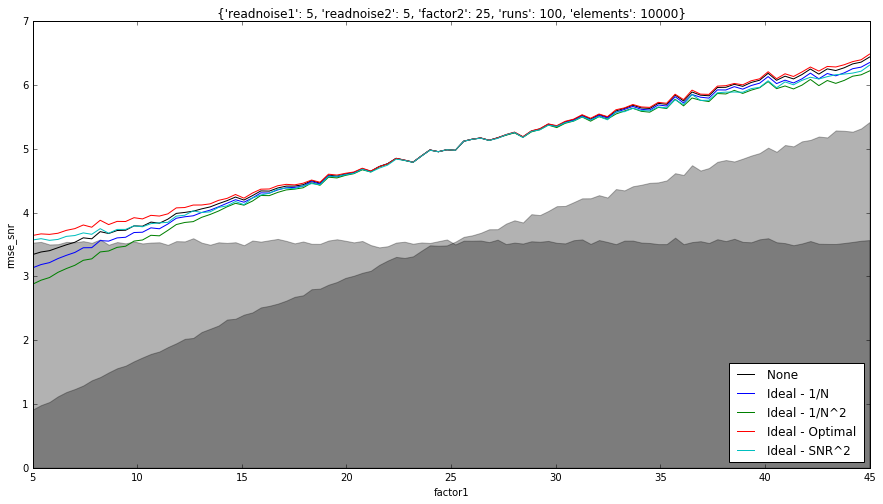

In [11]:
factory.plot('rmse_snr', include_ideal=True, include_der=False)

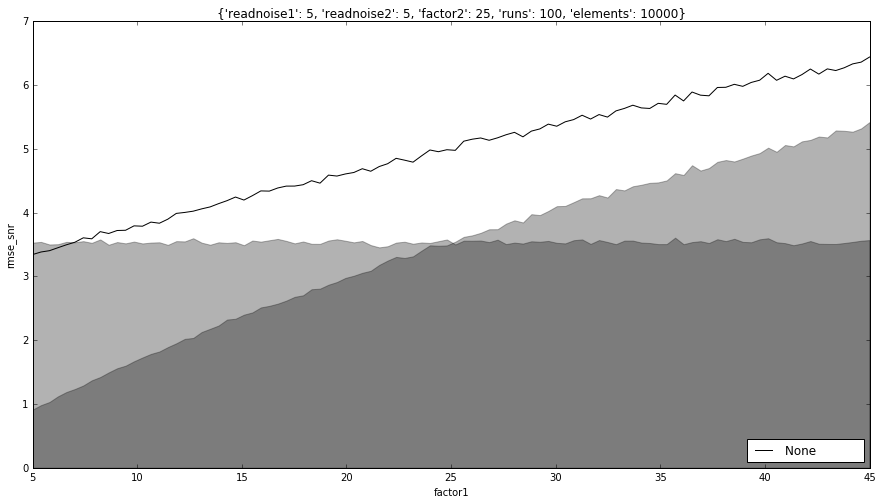

In [12]:
factory.plot('rmse_snr', include_ideal=False, include_der=False)

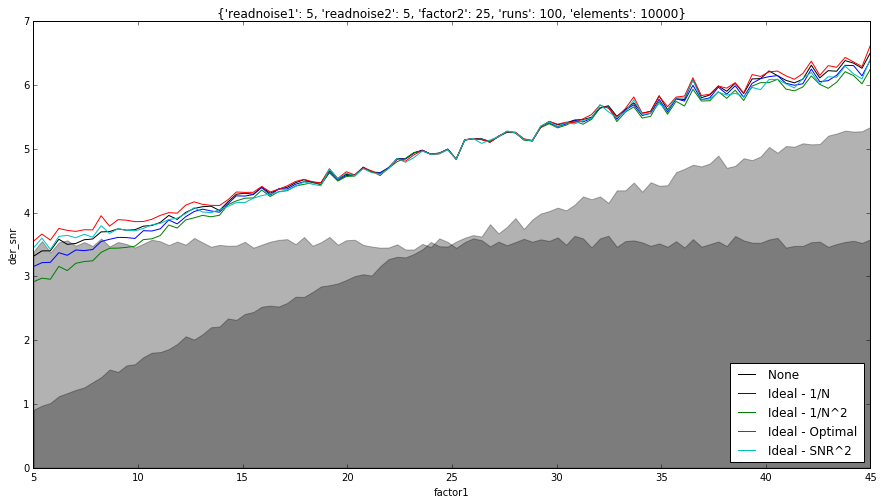

In [13]:
factory.plot('der_snr', include_ideal=True, include_der=False)

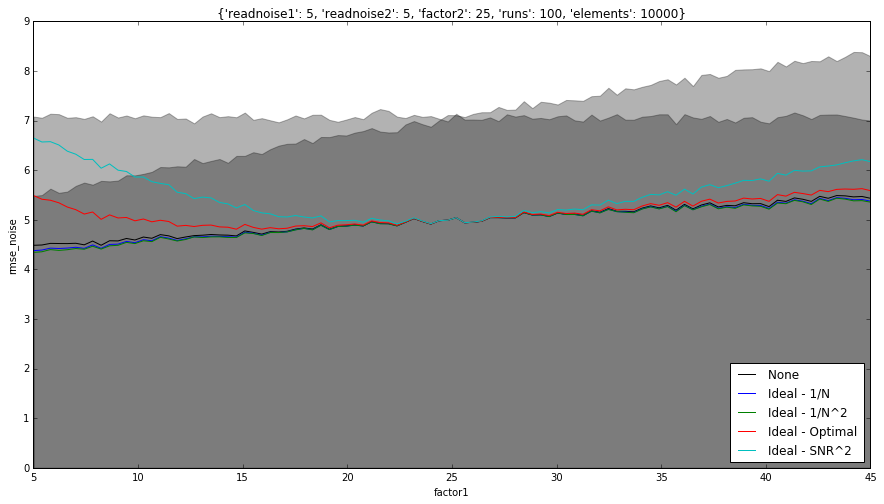

In [14]:
factory.plot('rmse_noise', include_ideal=True, include_der=False)

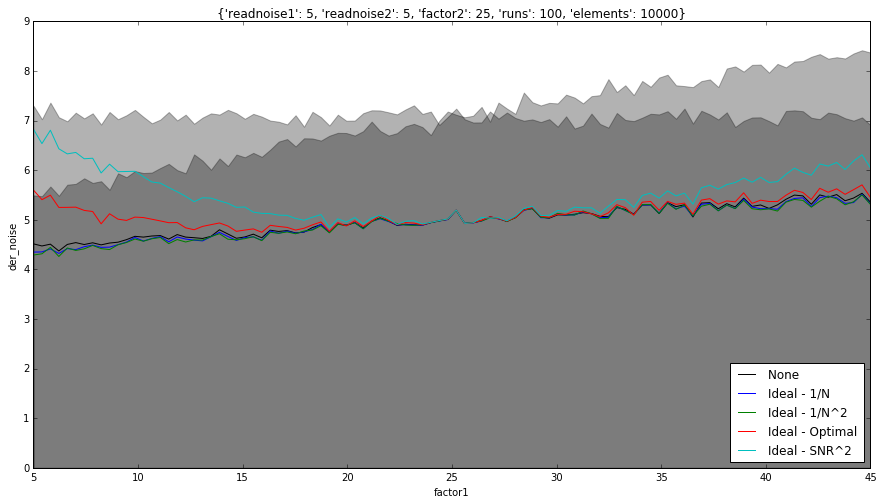

In [15]:
factory.plot('der_noise', include_ideal=True, include_der=False)

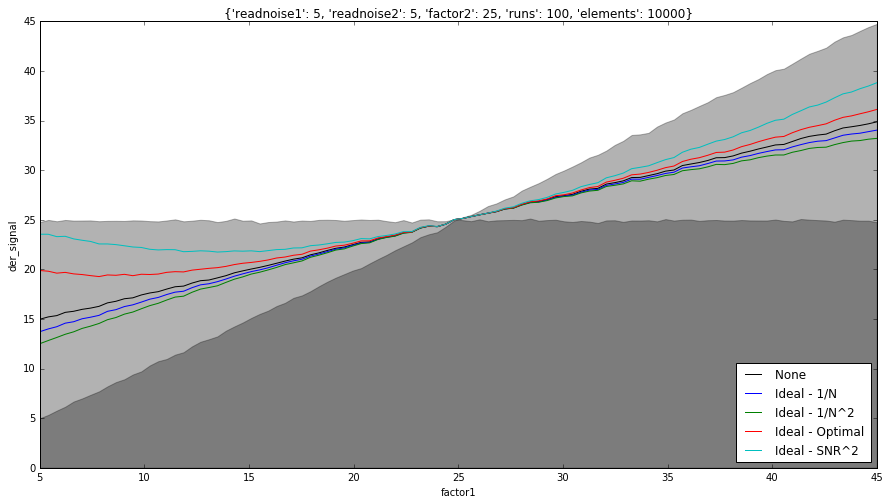

In [16]:
factory.plot('der_signal', include_ideal=True, include_der=False)

In [17]:
factory.save('test.json')

In [18]:
factory2 = AnalyseFactory.fromfile('test.json')

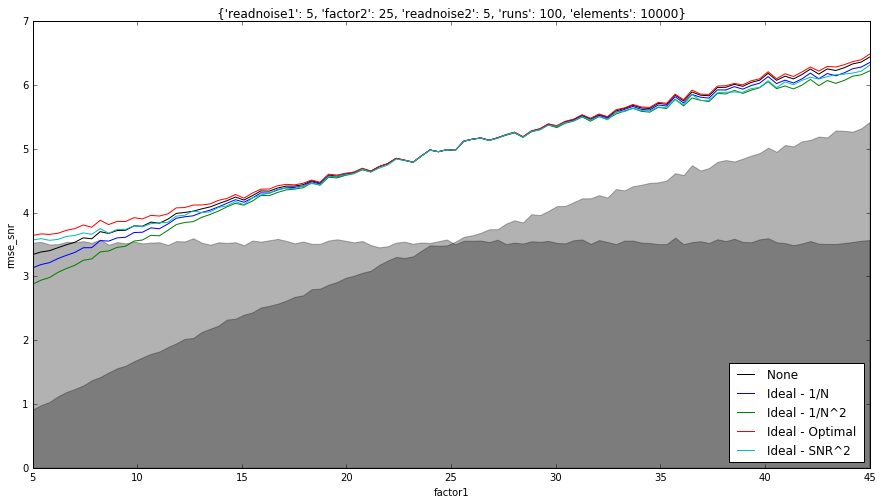

In [19]:
factory2.plot('rmse_snr', include_ideal=True, include_der=False)